# 线性回归 Linear Regression

在这个项目中，我们将了解一下 **线性回归**。
我们会先了解线性回归背后的数学原理，然后再用Python实现。同时也会对线性模型进行分析。

## 概述

<img src="data/linear.png" alt="Drawing" style="width: 300px;"/>

~$\hat{y} = XW~$

*方程中*:
* ~$\hat{y}~$ = 预测值 | ~$\in \mathbb{R}^{NX1}~$ (~$N~$ 是样本个数)
* ~$X~$ = 输入 | ~$\in \mathbb{R}^{NXD}~$ (~$D~$ 是特征个数)
* ~$W~$ = 权重 | ~$\in \mathbb{R}^{DX1}~$ 

* **目标:** 通过线性模型预测当输入为 ~$X~$ 时的输出值 ~$\hat{y}~$ 。
* **优点:**
	* 计算简单。 
	* 可解释性强。
	* 可用于连续(continuous)和类别(categorical)特征。
* **缺点:**
	* 对于分类任务, 线性模型只可用于线性可分的数据
	* 一般来说只用于回归任务.
* **其它:** 预设一个阈值，当预测的连续值都高于这个阈值的时候它就属于一个特定的分类，在这种情况下，线性回归可用于 **二分类任务**。 但其实我们之后会介绍更好的分类模型，所以暂时只会讲解如何使用线性回归完成回归任务。


## 训练
*步骤*: 
1. 随机初始化模型的权重 ~$W~$。
2. 将输入 ~$X~$ 穿进模型，得到预测值 ~$\hat{y}~$ 。
3. 我们一般通过损失函数计算预测值 ~$\hat{y}~$ 损失值和实际值 ~$y~$ 之间的差，从而得到损失值 ~$J~$。 在线性回归中一般用 **均方差(MSE)** 作为损失函数。 这个函数会计算预测值和实际值的差值的平方，方程中的 ~$\frac{1}{2}~$ 没有具体的数学意义，只是为了在求导时方便抵消
  * ~$MSE = J(\theta) = \frac{1}{2}\sum_{i}(\hat{y}_i - y_i)^2~$
4. 计算出模型权重的损失梯度$J(\theta)$
  * ~$J(\theta) = \frac{1}{2}\sum_{i}(\hat{y}_i - y_i)^2 = \frac{1}{2}\sum_{i}(X_iW - y_i)^2~$
  * ~$\frac{\partial{J}}{\partial{W}} = X(\hat{y} - y)~$
5. 用学习率 ~$\alpha~$ 和优化方法(比如随机梯度下降)，通过 **反向传播(backpropagation)** ，更新模型权重。一个简单的类比是，梯度会告诉我们如何增大某些数值，然后通过减法来使得损失值越来越小。有关梯度下降的更多知识可以查看 [这个项目](https://www.kesci.com/home/project/5a532064a3720d4f592495cc)
  * ~$W = W- \alpha\frac{\partial{J}}{\partial{W}}~$
5. 重复2 - 4步直到模型的表现最好。

## 数据
这儿我们造了一些假数据来进行线性回归。

In [1]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# 参数
args = Namespace(
    seed=1234,
    data_file="data/sample_data.csv",
    num_samples=100,
    train_size=0.75,
    test_size=0.25,
    num_epochs=100,
)

# 设置随机种子来保证结果可复现
np.random.seed(args.seed)

In [3]:
# 生成数据
def generate_data(num_samples):
    X = np.array(range(num_samples))
    random_noise = np.random.uniform(-10,10,size=num_samples)
    y = 3.65*X + 10 + random_noise # add some noise
    return X, y

In [4]:
# 生成随机但是线性的数据
X, y = generate_data(args.num_samples)
data = np.vstack([X, y]).T
df = pd.DataFrame(data, columns=['X', 'y'])
df.head()

,X,y
0,0.0,3.830389
1,1.0,16.092175
2,2.0,16.054555
3,3.0,26.657172
4,4.0,30.199516


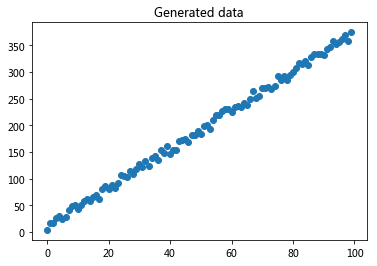

In [5]:
# 散点图
plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.show()

## 使用 Scikit-learn 实现

**注意**: Scikit-Learn中的 `LinearRegression` 类 通过正规方程(normal equation)进行拟合，我们则会使用随机梯度下降`SGDRegressor` 类。未来的几节课程中我们也会用它做优化。

In [6]:
# 引入包
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(
    df["X"].values.reshape(-1, 1), df["y"], test_size=args.test_size, 
    random_state=args.seed)
print ("X_train:", X_train.shape)
print ("y_train:", y_train.shape)
print ("X_test:", X_test.shape)
print ("y_test:", y_test.shape)

X_train: (75, 1)
y_train: (75,)
X_test: (25, 1)
y_test: (25,)


标准化数据（零均值和单位方差）来正确使用SGD并快速优化。

In [8]:
# 标准化训练集
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train.values.reshape(-1,1))

# 分别在训练集和测试集上做标准化
standardized_X_train = X_scaler.transform(X_train)
standardized_y_train = y_scaler.transform(y_train.values.reshape(-1,1)).ravel()
standardized_X_test = X_scaler.transform(X_test)
standardized_y_test = y_scaler.transform(y_test.values.reshape(-1,1)).ravel()

print ("mean:", np.mean(standardized_X_train, axis=0), 
       np.mean(standardized_y_train, axis=0)) # mean should be ~0
print ("std:", np.std(standardized_X_train, axis=0), 
       np.std(standardized_y_train, axis=0))   # std should be 1

mean: [8.22952817e-17] 7.350601608872391e-17
std: [1.] 1.0


In [9]:
# 初始化模型
lm = SGDRegressor(loss="squared_loss", penalty="none", max_iter=args.num_epochs)

In [10]:
# 训练
lm.fit(X=standardized_X_train, y=standardized_y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=100,
       n_iter=None, n_iter_no_change=5, penalty='none', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [11]:
# 预测(未标准化)
pred_train = (lm.predict(standardized_X_train) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
pred_test = (lm.predict(standardized_X_test) * np.sqrt(y_scaler.var_)) + y_scaler.mean_

## 评估

有很多种常用的评估技巧来检查模型的表现。

In [12]:
import matplotlib.pyplot as plt

In [13]:
# 计算训练集和测试集的方差
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print ("train_MSE: {0:.2f}, test_MSE: {1:.2f}".format(train_mse, test_mse))

train_MSE: 29.14, test_MSE: 35.00



除了使用MSE，当只有一个特征向量时，我们可容易通过可视化更直观的查看模型。

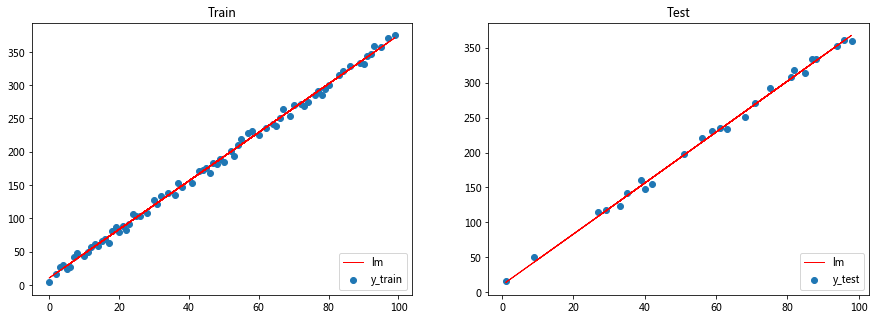

In [14]:
# 调整图大小
plt.figure(figsize=(15,5))

# 画出训练数据
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="lm")
plt.legend(loc='lower right')

# 画出测试数据
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label="y_test")
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="lm")
plt.legend(loc='lower right')

# 出图
plt.show()

## 推论

In [15]:
# 导入我们自己的输入值
X_infer = np.array((0, 1, 2), dtype=np.float32)
standardized_X_infer = X_scaler.transform(X_infer.reshape(-1, 1))
pred_infer = (lm.predict(standardized_X_infer) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
print (pred_infer)
df.head(3)

[10.50158072 14.14515288 17.78872504]


,X,y
0,0.0,3.830389
1,1.0,16.092175
2,2.0,16.054555


## 可解释性
Linear regression offers the great advantage of being highly interpretable. Each feature has a coefficient which signifies it's importance/impact on the output variable y. We can interpret our coefficient as follows: By increasing X by 1 unit, we increase y by $W$ (~3.65) units. 

**Note**: Since we standardized our inputs and outputs for gradient descent, we need to apply an operation to our coefficients and intercept to interpret them. See proof below.

线性回归提供了很强的可解释性，每一个特征都对应一个系数来控制对输出值 ~$y~$ 影响的大小。
可以这样解释这个系数: 当 ~$x~$ 的值增加1, ~$y~$ 值将会增加 ~$W~$ (~3.65)。

**注意:** 因为在梯度下降时标准化了输入和输出，我们需要对系数和截距做反标准化操作。下面会有证明。

In [16]:
# 反标准化操作 
coef = lm.coef_ * (y_scaler.scale_/X_scaler.scale_)
intercept = lm.intercept_ * y_scaler.scale_ + y_scaler.mean_ - np.sum(coef*X_scaler.mean_)
print (coef) # ~3.65
print (intercept) # ~10

[3.64357519]
[10.50158285]


### 非标准化系数的证明:


注意 X 和 y 都已经被标准化了

~$\frac{\mathbb{E}[y] - \hat{y}}{\sigma_y} = W_0 + \sum_{j=1}^{k}W_jz_j~$

~$z_j = \frac{x_j - \bar{x}_j}{\sigma_j}~$

~$\hat{y}_{scaled} = \frac{\hat{y}_{unscaled} - \bar{y}}{\sigma_y} = \hat{W_0} + \sum_{j=1}^{k} \hat{W}_j (\frac{x_j - \bar{x}_j}{\sigma_j})~$

~$\hat{y}_{unscaled} = \hat{W}_0\sigma_y + \bar{y} - \sum_{j=1}^{k} \hat{W}_j(\frac{\sigma_y}{\sigma_j})\bar{x}_j + \sum_{j=1}^{k}(\frac{\sigma_y}{\sigma_j})x_j~$

## 正则化

正规化可以帮助减少过拟合。下面是 **L2正则化(ridge regression)** ，当然也有其他正则化的方法来帮助减少模型的过拟合。进行L2正则化时, 我们会减小那些数值很大的权重，因为这些数值很大的权重将会使模型更依赖它们所对应的特征，而一般来说我们期望模型会公平依赖所有的特征而不是其中几个。 
当然也有其他的正则化方法，比如 **L1正则化(lasso regression)** ，有助于训练更加稀疏的模型，因为它会让一些权重变成0。**弹性网络回归 (elastic net regression)**则结合了L1正则和L2正则。

**注意**: 正则化不仅可以用于线性回归，它可以用于任何模型，包括我们以后将会接触的模型。

* ~$J(\theta) = = \frac{1}{2}\sum_{i}(X_iW - y_i)^2 + \frac{\lambda}{2}\sum\sum W^2~$
* ~$\frac{\partial{J}}{\partial{W}}  = X (\hat{y} - y) + \lambda W~$
* ~$W = W- \alpha\frac{\partial{J}}{\partial{W}}~$
其中:
  * ~$\lambda~$ 是正则化系数

In [17]:
# 初始化带有L2正则化的模型
lm = SGDRegressor(loss="squared_loss", penalty='l2', alpha=1e-2, 
                  max_iter=args.num_epochs)

In [18]:
# 训练
lm.fit(X=standardized_X_train, y=standardized_y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=100,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [19]:
# 预测(未标准化)
pred_train = (lm.predict(standardized_X_train) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
pred_test = (lm.predict(standardized_X_test) * np.sqrt(y_scaler.var_)) + y_scaler.mean_

In [20]:
# 训练集和测试集的MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print ("train_MSE: {0:.2f}, test_MSE: {1:.2f}".format(
    train_mse, test_mse))

train_MSE: 30.22, test_MSE: 35.73



正则化对于我们正在使用的建模数据作用不大，因为我们在创建假数据的时候使用的就是一个完美线性函数。
当处理真实数据的时候，正则化就可以帮助我们训练出更好的模型。

In [21]:
# 未标准化系数
coef = lm.coef_ * (y_scaler.scale_/X_scaler.scale_)
intercept = lm.intercept_ * y_scaler.scale_ + y_scaler.mean_ - (coef*X_scaler.mean_)
print (coef) # ~3.65
print (intercept) # ~10

[3.60760035]
[12.17506412]


## 类别变量
在上面的例子中，特征是连续的数值。如果使用的数据含类别特征呢？
一种常用的方法就是使用 **独热编码** 来处理类别变量。 Pandas很容易实现这种方法，训练线性模型的方法和上面类似。

In [22]:
# 创建类别特征
cat_data = pd.DataFrame(['a', 'b', 'c', 'a'], columns=['favorite_letter'])
cat_data.head()

,favorite_letter
0,a
1,b
2,c
3,a


In [23]:
dummy_cat_data = pd.get_dummies(cat_data)
dummy_cat_data.head()

,favorite_letter_a,favorite_letter_b,favorite_letter_c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


现在就可以拼接连续特征变量，从而训练线性模型。